<a href="https://colab.research.google.com/github/soufianegouait/MedicalCostInsurance/blob/main/Project_ML_Medical_Insurance_Cost_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Importing the Dependencies

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics

Data Collection & Analysis

In [ ]:
# loading the data from csv file to a Pandas DataFrame
insurance_dataset = pd.read_csv('/content/insurance.csv')

In [ ]:
# first 5 rows of the dataframe
insurance_dataset.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [ ]:
# number of rows and columns
insurance_dataset.shape

(1338, 7)

In [ ]:
# getting some informations about the dataset
insurance_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


Categorical Features:
- Sex
- Smoker
- Region

In [ ]:
# checking for missing values
insurance_dataset.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

Data Analysis

In [ ]:
# statistical Measures of the dataset
insurance_dataset.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


<ipython-input-8-a09f4e9f1a6d>:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(insurance_dataset['age'])


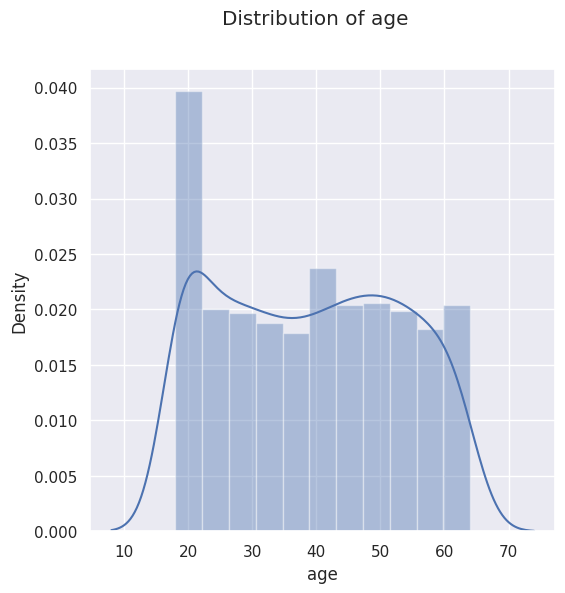

In [ ]:
import matplotlib.pyplot as plt

# distribution of age value
sns.set()
plt.figure(figsize=(6,6))
sns.distplot(insurance_dataset['age'])
plt.suptitle('Distribution of age')
plt.show()

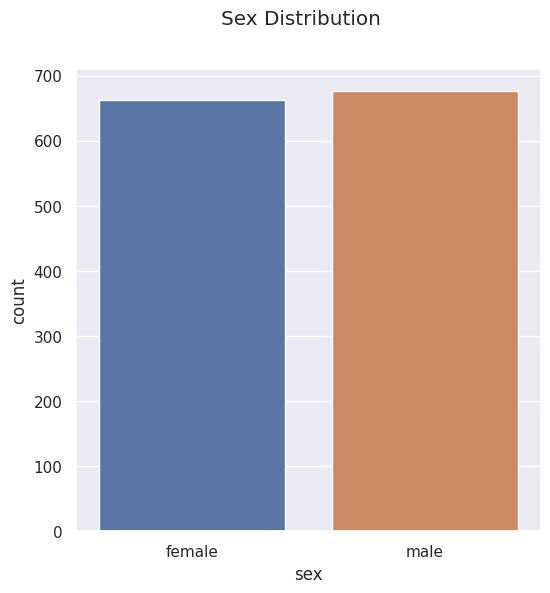

In [ ]:
# Gender column
plt.figure(figsize=(6,6))
sns.countplot(x='sex', data=insurance_dataset)
plt.suptitle('Sex Distribution')
plt.show()

In [ ]:
insurance_dataset['sex'].value_counts()

male      676
female    662
Name: sex, dtype: int64

<ipython-input-11-142c2b9a6636>:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(insurance_dataset['bmi'])


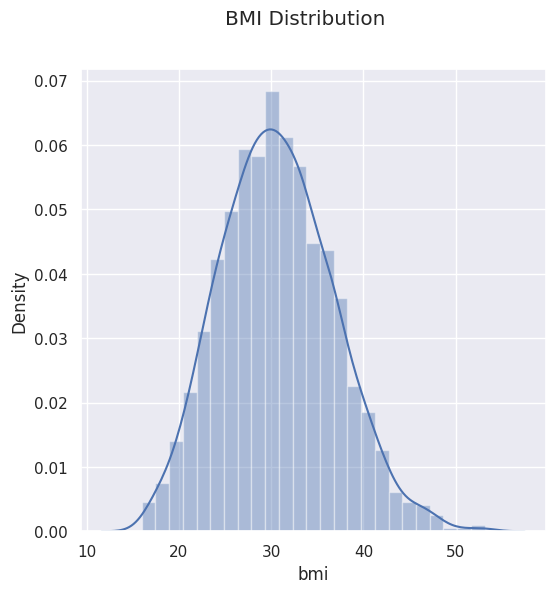

In [ ]:
# bmi distribution
plt.figure(figsize=(6,6))
sns.distplot(insurance_dataset['bmi'])
plt.suptitle('BMI Distribution')
plt.show()

Normal BMI Range --> 18.5 to 24.9

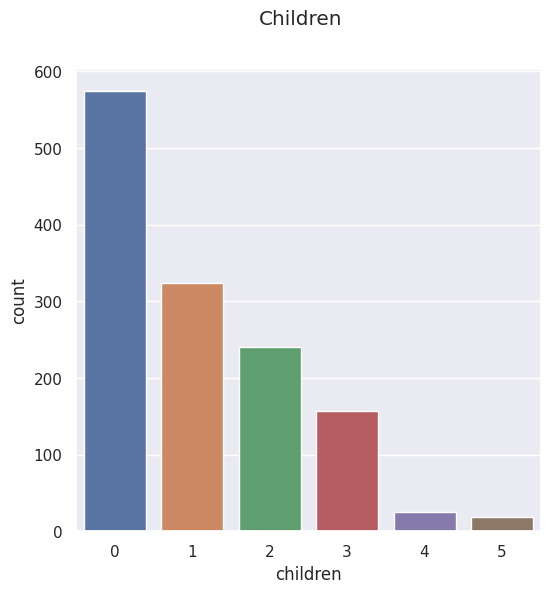

In [ ]:
# children column
plt.figure(figsize=(6,6))
sns.countplot(x='children', data=insurance_dataset)
plt.suptitle('Children')
plt.show()

In [ ]:
insurance_dataset['children'].value_counts()

0    574
1    324
2    240
3    157
4     25
5     18
Name: children, dtype: int64

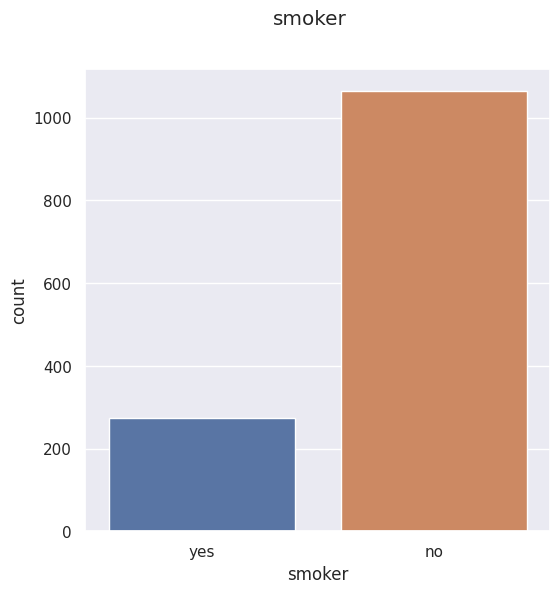

In [ ]:
# smoker column
plt.figure(figsize=(6,6))
sns.countplot(x='smoker', data=insurance_dataset)
plt.suptitle('smoker')
plt.show()

In [ ]:
insurance_dataset['smoker'].value_counts()

no     1064
yes     274
Name: smoker, dtype: int64

In [ ]:
insurance_dataset['region'].value_counts()

southeast    364
southwest    325
northwest    325
northeast    324
Name: region, dtype: int64

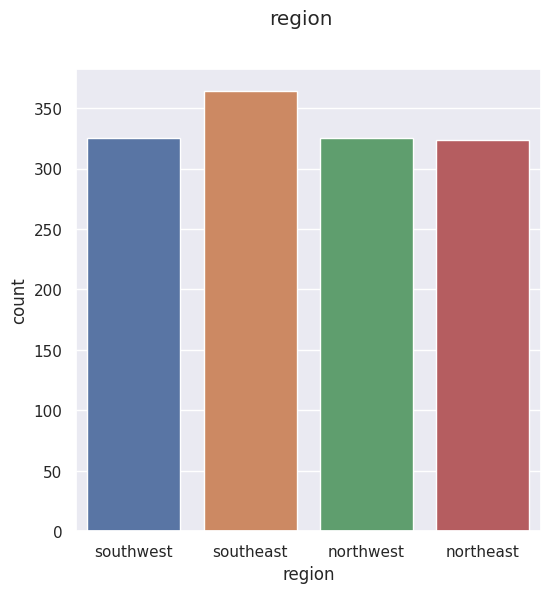

In [ ]:
# region column
plt.figure(figsize=(6,6))
sns.countplot(x='region', data=insurance_dataset)
plt.suptitle('region')
plt.show()

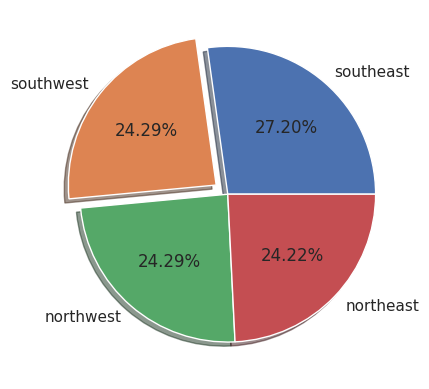

In [ ]:
plt.pie(labels=insurance_dataset['region'].value_counts().index, x=insurance_dataset['region'].value_counts().values,shadow=True,autopct= '%.2f%%', explode = (0,0.1,0,0))
plt.suptitle=("Distribution of regions")
plt.show()

In [ ]:
insurance_dataset['region'].value_counts()

southeast    364
southwest    325
northwest    325
northeast    324
Name: region, dtype: int64

<ipython-input-20-e4c6bfe93d0d>:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(insurance_dataset['charges'])


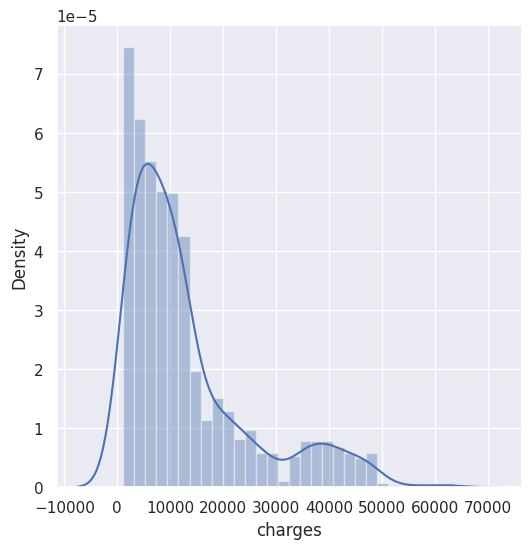

In [ ]:
# distribution of charges value
plt.figure(figsize=(6,6))
sns.distplot(insurance_dataset['charges'])
#plt.suptitle('Distribution of charges')
plt.show()

Data Pre-Processing

Encoding the categorical features

In [ ]:
# encoding sex column
insurance_dataset.replace({'sex':{'male':0,'female':1}}, inplace=True)

3 # encoding 'smoker' column
insurance_dataset.replace({'smoker':{'yes':0,'no':1}}, inplace=True)

# encoding 'region' column
insurance_dataset.replace({'region':{'southeast':0,'southwest':1,'northeast':2,'northwest':3}}, inplace=True)

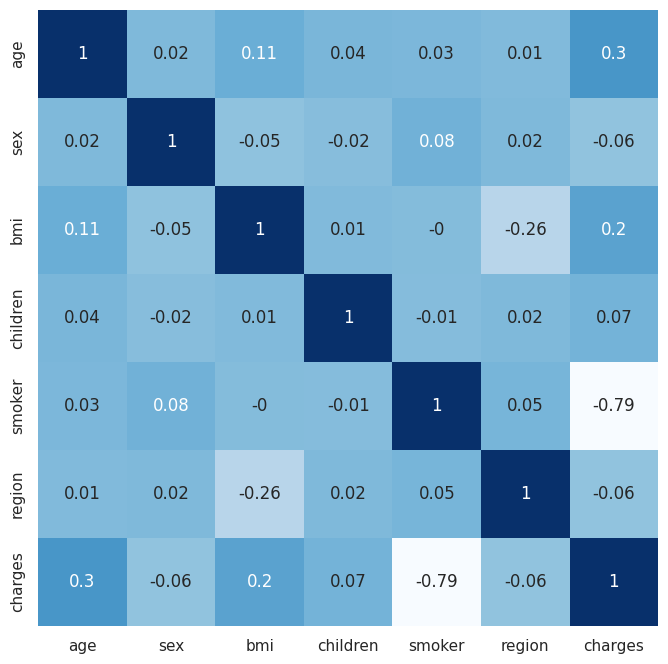

In [ ]:
corr_data = insurance_dataset[["age", "sex", "bmi", "children", "smoker", "region", "charges"]].corr()
plt.figure(figsize=(8,8))
sns.heatmap(round(corr_data, 2), annot=True, cmap="Blues", cbar=False)
#plt.suptitle("Correlation Heatmap: Age, BMI, and Charges ")
plt.show()

Splitting the Features and Target

In [ ]:
X = insurance_dataset.drop(columns='charges', axis=1)
Y = insurance_dataset['charges']



---


In [ ]:
print(X)  #independant variables or features

      age  sex     bmi  children  smoker  region
0      19    1  27.900         0       0       1
1      18    0  33.770         1       1       0
2      28    0  33.000         3       1       0
3      33    0  22.705         0       1       3
4      32    0  28.880         0       1       3
...   ...  ...     ...       ...     ...     ...
1333   50    0  30.970         3       1       3
1334   18    1  31.920         0       1       2
1335   18    1  36.850         0       1       0
1336   21    1  25.800         0       1       1
1337   61    1  29.070         0       0       3

[1338 rows x 6 columns]


In [ ]:
print(Y)  #dependant variables

0       16884.92400
1        1725.55230
2        4449.46200
3       21984.47061
4        3866.85520
           ...     
1333    10600.54830
1334     2205.98080
1335     1629.83350
1336     2007.94500
1337    29141.36030
Name: charges, Length: 1338, dtype: float64


Splitting the data into Training data & Testing Data

In [ ]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=2)  #train 80% test 20%

In [ ]:
print(X.shape, X_train.shape, X_test.shape)

(1338, 6) (1070, 6) (268, 6)


Model Training

Linear Regression

In [ ]:
# loading the Linear Regression model
regressor = LinearRegression()

In [ ]:
regressor.fit(X_train, Y_train)
# The coefficients
print ('Coefficients: ', regressor.coef_)  # w1, w2, w3, w4, w5, w6 parceque X = [X1, X2, X3, X4, X5, X6]
print ('Intercept: ',regressor.intercept_)

Coefficients:  [   251.40512196     26.11715966    330.64637157    580.27438296
 -23928.10171061    212.22242728]
Intercept:  11357.668742540951


Model Evaluation

In [ ]:
# prediction on training data
Y_train_predicted =regressor.predict(X_train)

In [ ]:
# R squared value
r2_train = metrics.r2_score(Y_train, Y_train_predicted)
print('R squared value Training: ', r2_train)

R squared vale :  0.751505643411174


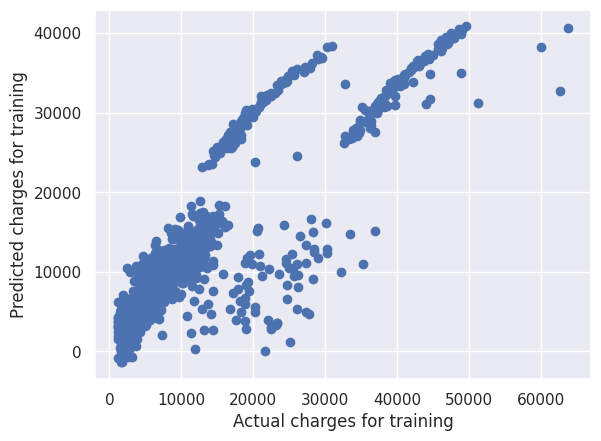

In [ ]:
plt.scatter(Y_train, Y_train_predicted)
plt.xlabel("Actual charges for training")
plt.ylabel("Predicted charges for training")
plt.show()

In [ ]:
# prediction on testing data
Y_test_predicted =regressor.predict(X_test)

R squared value :  0.7447273869684076


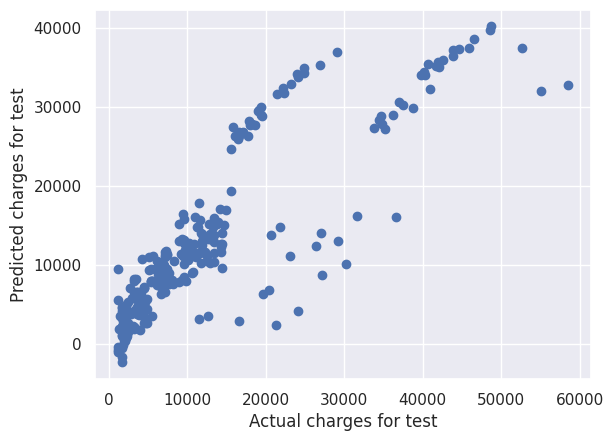

In [ ]:
# R squared value
r2_test = metrics.r2_score(Y_test, Y_test_predicted)
print('R squared value Testing: ', r2_test)

plt.scatter(Y_test, Y_test_predicted)
plt.xlabel("Actual charges for test")
plt.ylabel("Predicted charges for test")
plt.show()

In [ ]:
#Cross validation
from sklearn.model_selection import cross_val_score, cross_validate
result= cross_validate(regressor, X, Y, cv=5, return_train_score=True, scoring='r2')
result

{'fit_time': array([0.01416779, 0.00585818, 0.01418471, 0.01553321, 0.01796985]),
 'score_time': array([0.00464511, 0.01885843, 0.01165509, 0.01150966, 0.0027802 ]),
 'test_score': array([0.76258026, 0.70682745, 0.77683066, 0.7319328 , 0.75695771]),
 'train_score': array([0.74681   , 0.75942866, 0.7431764 , 0.75502084, 0.74859194])}

In [ ]:
Trainning_score_mean = result['train_score'].mean()*100
print('Trainning score mean = ', round(Trainning_score_mean,2), '%')

Trainning score mean =  75.06 %


Training socre mean indicates how well the model fits the training data. A higher R-squared value suggests a better fit.

The model is fitting the training data reasonably well, with an average R-squared of 75.06%.

In [ ]:
Testing_score_mean = result['test_score'].mean()*100
print('Testing score mean = ', round(Tetsing_score_mean,2), '%')

Tesing score mean =  74.7 %


Testing score mean indicates how well the model generalizes to new, unseen data. A higher R-squared value suggests better generalization.

The model also generalizes well to new, unseen data, with an average R-squared of 74.7% on the test set.

Multiple Models

In [ ]:
from sklearn. linear_model import LinearRegression
from sklearn. neighbors import KNeighborsRegressor
from sklearn. tree import DecisionTreeRegressor
from sklearn. ensemble import RandomForestRegressor

models = []
models.append(("Linear Regression", LinearRegression()))
models.append(("knn", KNeighborsRegressor()))
models.append(("Decision Tree", DecisionTreeRegressor()))
models.append(("Random Forest", RandomForestRegressor()))
for model in models:
  result = cross_validate(model[1], X, Y, cv = 5, return_train_score= True, scoring= 'r2')
  print(model[0])
  train_acc = round((result["train_score"].mean())* 100, 2)
  test_acc = round((result["test_score"].mean())* 100, 2)
  print(f'Train R2 score : ',train_acc,'%')
  print(f'Test R2 score : ',test_acc,'%')
  print('\n')

Linear Regression
Train R2 score :  75.06 %
Test R2 score :  74.7 %


knn
Train R2 score :  40.03 %
Test R2 score :  8.63 %


Decision Tree
Train R2 score :  99.9 %
Test R2 score :  70.72 %


Random Forest
Train R2 score :  97.63 %
Test R2 score :  83.58 %




* The Linear Regression model performs reasonably well on both the training and test sets. The R-squared scores are close, indicating good generalization to unseen data.

* The KNN model has a lower R-squared score, suggesting that it might not be the best fit for our data. The model seems to struggle with generalizing to new data.

* The Decision Tree Regressor model shows very high training R-squared but a lower test R-squared. This suggests potential overfitting to the training data.


* The RandomForestRegressor model has a high R-squared score on both training and test sets, indicating good performance. The gap between training and test scores is relatively small, suggesting good generalization.

Random Forest Hyperparameter Tuning Using RandomSearch.

In [ ]:
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV

params = {
  'n_estimators': [100, 200, 300], # Number of trees in random forest
  'max_depth': [None, 5, 101], # Maximum number of levels in tree
  'min_samples_split': [2, 5, 10], # Minimum number of samples required to split a node
  'min_samples_leaf': [1, 2, 4], # Minimum number of samples required at each Leaf node
  'bootstrap': [True, False] # Method of selecting samples for training each tree
}


## Tunning using random search..

random_search = RandomizedSearchCV(
  param_distributions=params, # Specify the parameter distributions to sample from
  estimator=RandomForestRegressor(), # Specify the estimator to use
  cv=5, # Number of cross-validation folds
  return_train_score=True, #Include training scores in the results
  scoring='r2', # Scoring ric to optimize
  n_jobs=-1 # Use all available CPU cores for parallel computation
)

In [ ]:
random_search.fit(X_train, Y_train)

RandomizedSearchCV(cv=5, estimator=RandomForestRegressor(), n_jobs=-1,
                   param_distributions={'bootstrap': [True, False],
                                        'max_depth': [None, 5, 101],
                                        'min_samples_leaf': [1, 2, 4],
                                        'min_samples_split': [2, 5, 10],
                                        'n_estimators': [100, 200, 300]},
                   return_train_score=True, scoring='r2')

In [ ]:
random_search.best_params_

{'n_estimators': 100,
 'min_samples_split': 5,
 'min_samples_leaf': 4,
 'max_depth': 5,
 'bootstrap': True}

In [ ]:
print(round(random_search.cv_results_['mean_train_score'].mean() * 100, 2), '%')

90.45 %


In [ ]:
print(round(random_search.cv_results_['mean_test_score'].mean() * 100, 2), '%')

82.61 %


In [ ]:
RF = RandomForestRegressor(n_estimators=100,
                           min_samples_split=5,
                           min_samples_leaf=2,
                           max_depth=5,
                           bootstrap=True)

In [ ]:
RF.fit(X_train, Y_train)

RandomForestRegressor(max_depth=5, min_samples_leaf=2, min_samples_split=5)

In [ ]:
from sklearn.metrics import r2_score

predicted_train_data = RF.predict(X_train)
train_score = r2_score(y_true=Y_train, y_pred=predicted_train_data)

predicted_test_data = RF.predict(X_test)

test_score = r2_score(y_true=Y_test, y_pred=predicted_test_data)

print(f"R-squared (R*2) For Training Data Using Random Forest: {round(train_score,2)*100} %")
print(f"R-squared (R*2) For Testing Data Using Random Forest: {round(test_score,2)*100} %")

R-squared (R*2) For Training Data Using Random Forest: 89.0 %
R-squared (R*2) For Testing Data Using Random Forest: 87.0 %



---

Building a Predictive System

In [ ]:
input_data = (31,1,25.74,0,1,0)

# changing input_data to a numpy array
input_data_as_numpy_array = np.asarray(input_data)

# reshape the array
input_data_reshaped = input_data_as_numpy_array.reshape(1,-1)

prediction = regressor.predict(input_data_reshaped)
print(prediction)

test = RF.predict(input_data_reshaped)
print(test)

print('The insurance cost is USD ', prediction[0])

[3760.0805765]
[4467.30934636]
The insurance cost is USD  3760.080576496057


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
